<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/Lung%20cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [53]:
data=pd.read_csv("/content/thirddatasetdata1.csv")

In [54]:
data.columns

Index(['ID', 'imaging.radiomics.GLCM_autocorr',
       'imaging.radiomics.GLCM_clusProm', 'imaging.radiomics.GLCM_clusShade',
       'imaging.radiomics.GLCM_clusTend', 'imaging.radiomics.GLCM_contrast',
       'imaging.radiomics.GLCM_correl1', 'imaging.radiomics.GLCM_diffEntro',
       'imaging.radiomics.GLCM_dissimilar', 'imaging.radiomics.GLCM_energy',
       ...
       'imaging.radiomics.Wavelet_LLL_stats_median',
       'imaging.radiomics.Wavelet_LLL_stats_min',
       'imaging.radiomics.Wavelet_LLL_stats_range',
       'imaging.radiomics.Wavelet_LLL_stats_rms',
       'imaging.radiomics.Wavelet_LLL_stats_skewness',
       'imaging.radiomics.Wavelet_LLL_stats_std',
       'imaging.radiomics.Wavelet_LLL_stats_totalenergy',
       'imaging.radiomics.Wavelet_LLL_stats_uniformity',
       'imaging.radiomics.Wavelet_LLL_stats_var', 'Label'],
      dtype='object', length=638)

**DATA PREPROCESSING**

In [55]:
data_real = data.replace(np.inf, np.nan)

In [56]:
data_real.isnull().sum().sum()

100

In [57]:
data_df = data_real.dropna(axis=0)

In [32]:
data_df.isnull().sum().sum()

0

In [58]:
data_df

,ID,imaging.radiomics.GLCM_autocorr,imaging.radiomics.GLCM_clusProm,imaging.radiomics.GLCM_clusShade,imaging.radiomics.GLCM_clusTend,imaging.radiomics.GLCM_contrast,imaging.radiomics.GLCM_correl1,imaging.radiomics.GLCM_diffEntro,imaging.radiomics.GLCM_dissimilar,imaging.radiomics.GLCM_energy,...,imaging.radiomics.Wavelet_LLL_stats_median,imaging.radiomics.Wavelet_LLL_stats_min,imaging.radiomics.Wavelet_LLL_stats_range,imaging.radiomics.Wavelet_LLL_stats_rms,imaging.radiomics.Wavelet_LLL_stats_skewness,imaging.radiomics.Wavelet_LLL_stats_std,imaging.radiomics.Wavelet_LLL_stats_totalenergy,imaging.radiomics.Wavelet_LLL_stats_uniformity,imaging.radiomics.Wavelet_LLL_stats_var,Label
0,1,453.182272,104777.28120,674.017890,222.638902,27.372666,0.781116,2.392952,4.064393,0.002345,...,1662.196015,467.866888,2602.393670,1817.531872,0.289817,558.438821,1.676156e+10,0.035583,311853.91710,adeno
1,2,528.315776,4260.94238,-216.316062,19.065842,5.393669,0.612640,1.524119,1.302619,0.113870,...,2982.188746,1371.523763,1961.257947,2905.312685,-2.215156,216.035768,3.254789e+10,0.237286,46671.45319,squamous
2,3,1127.285945,113572.19180,-1876.394931,160.306058,35.961316,0.630446,2.435402,3.931714,0.008031,...,2979.224981,643.909824,3576.484800,2846.375865,-0.924287,522.757809,7.111809e+10,0.057868,273275.72710,other
3,4,1168.460376,64098.28992,-1848.600663,91.839214,17.133651,0.682034,1.988541,2.409581,0.036164,...,2988.358359,711.386506,3196.094809,2832.966683,-1.833313,406.914394,2.640000e+11,0.136353,165579.32370,adeno
4,5,714.993885,42488.22647,-1328.998406,93.896236,20.667403,0.632109,2.188704,2.960161,0.030619,...,2919.649317,1004.777916,2547.097206,2762.306176,-1.157273,443.861554,2.112840e+10,0.099191,197013.07940,adeno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,1139.334792,14516.60896,244.741173,46.462792,16.106440,0.482397,1.983495,2.391288,0.022039,...,3055.887195,1112.092053,3328.668697,3101.039311,-0.426993,316.952421,8.079737e+10,0.111039,100458.83710,squamous
219,220,818.698358,87742.27268,-2055.586897,157.898761,23.252008,0.742900,2.265772,3.303056,0.009143,...,2797.141552,869.433409,2899.659059,2699.092216,-0.864501,499.276162,5.765427e+10,0.051432,249276.68600,squamous
220,221,801.695540,76994.34218,-2098.066288,132.491348,18.352911,0.753683,2.121198,2.716123,0.020977,...,3052.583286,1007.135169,2617.232001,2891.348422,-1.185849,477.287930,1.590000e+11,0.074412,227803.76820,adeno
221,222,341.806330,29115.57843,-784.954552,101.804686,19.284936,0.702816,2.202712,3.313602,0.009943,...,2565.730869,1397.617681,1740.429212,2515.580119,-0.602095,427.360059,2.505945e+09,0.050645,182636.61980,adeno


**Unnamed:0, Unnamed:0.1 columns** 

In [59]:
x = data_df.drop(['Label'], axis = 1)

In [60]:
x.columns 

Index(['ID', 'imaging.radiomics.GLCM_autocorr',
       'imaging.radiomics.GLCM_clusProm', 'imaging.radiomics.GLCM_clusShade',
       'imaging.radiomics.GLCM_clusTend', 'imaging.radiomics.GLCM_contrast',
       'imaging.radiomics.GLCM_correl1', 'imaging.radiomics.GLCM_diffEntro',
       'imaging.radiomics.GLCM_dissimilar', 'imaging.radiomics.GLCM_energy',
       ...
       'imaging.radiomics.Wavelet_LLL_stats_mean',
       'imaging.radiomics.Wavelet_LLL_stats_median',
       'imaging.radiomics.Wavelet_LLL_stats_min',
       'imaging.radiomics.Wavelet_LLL_stats_range',
       'imaging.radiomics.Wavelet_LLL_stats_rms',
       'imaging.radiomics.Wavelet_LLL_stats_skewness',
       'imaging.radiomics.Wavelet_LLL_stats_std',
       'imaging.radiomics.Wavelet_LLL_stats_totalenergy',
       'imaging.radiomics.Wavelet_LLL_stats_uniformity',
       'imaging.radiomics.Wavelet_LLL_stats_var'],
      dtype='object', length=637)

In [61]:
data_df.isnull().sum().sum()

0

In [62]:
y = data_df['Label']

**Label Encoding**

In [63]:
from sklearn.preprocessing import LabelEncoder 

In [64]:
le = LabelEncoder()

In [65]:
y_trans = le.fit_transform(y)
le_fid = LabelEncoder()

**Train Test Split**

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(x,y, train_size = 0.7)

**Standardization**

In [68]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

Normalization

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax= scaler.fit_transform(X_test)

Feature Importance

In [70]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

imaging.radiomics.Wavelet_HHL_rlgl_grayLevelNonuniformity    0.122113
ID                                                           0.106716
imaging.radiomics.Shape_maxDiameter3D                        0.103685
imaging.radiomics.Shape_maxDiameter3D_pdist                  0.103685
imaging.radiomics.LoG_sigma_2_mm_2D_stats_mean               0.101801
                                                               ...   
imaging.radiomics.Wavelet_HHH_stats_var                      0.000000
imaging.radiomics.Wavelet_HHH_stats_uniformity               0.000000
imaging.radiomics.Wavelet_HHH_stats_totalenergy              0.000000
imaging.radiomics.Wavelet_HHH_stats_std                      0.000000
imaging.radiomics.Wavelet_LLL_stats_var                      0.000000
Length: 637, dtype: float64

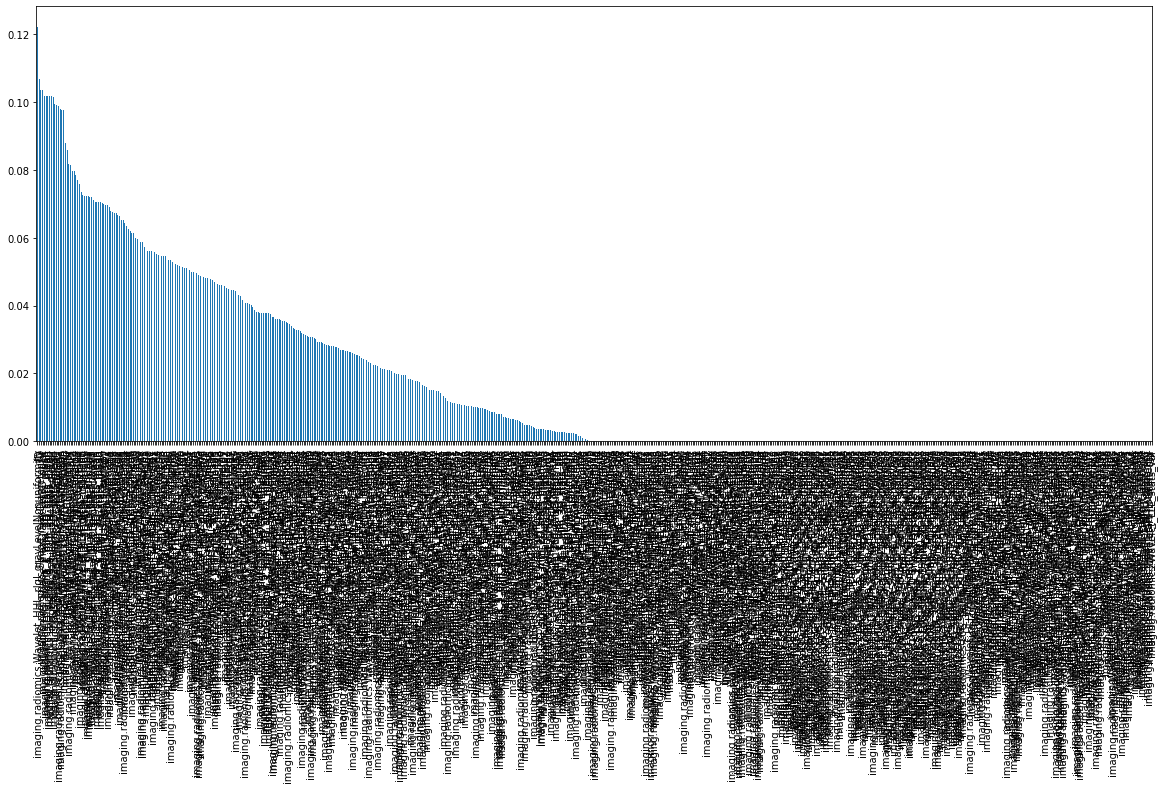

In [71]:
# visualize the feature importance
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

Feature selection

In [72]:
# select top 15 features
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(mutual_info_classif, k=5)
selector.fit(X_train, y_train)

# Get columns to keep and create new dataframe - "new_train"
cols = selector.get_support(indices=True)

# new dataframes
new_train = X_train.iloc[:,cols]
new_test = X_test.iloc[:,cols]

In [73]:
new_train

,ID,imaging.radiomics.LoG_sigma_2_mm_2D_stats_mean,imaging.radiomics.Shape_maxDiameter3D,imaging.radiomics.Shape_maxDiameter3D_pdist,imaging.radiomics.Wavelet_HHL_rlgl_grayLevelNonuniformity
27,28,3.422361,125.030774,125.030774,24038.119200
181,182,66.258095,33.131209,33.131209,366.687421
185,186,87.179543,14.975664,14.975664,85.388824
218,219,79.898445,36.829694,36.829694,869.835281
151,152,24.761274,81.192251,81.192251,6331.153395
...,...,...,...,...,...
58,59,47.317429,48.913134,48.913134,1493.922606
11,12,94.117546,15.786629,15.786629,88.468623
96,97,52.929333,30.497874,30.497874,557.546985
177,178,92.266624,33.481063,33.481063,439.558492


Model Training
1. Decision-tree

In [98]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None,min_samples_split=2, max_leaf_nodes=None)
dt.fit(new_train, y_train)
test_pred = dt.predict(new_test)

In [99]:
Y_predicted_dt = dt.predict(new_test)
Y_pred_train_dt = dt.predict(new_train)

In [103]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_dt, y_test))

ac = accuracy_score(y_test, Y_predicted_dt)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test, Y_predicted_dt, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test, Y_predicted_dt, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test, Y_predicted_dt, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_train, Y_pred_train_dt, average='macro')
print('\n Macro Averaged F1-Score on training :'+str(fm))

fm = f1_score(y_test, Y_predicted_dt, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[22  4  9]
 [ 3  3  2]
 [12  4  8]]

 Macro Averaged Accuracy :0.4925373134328358

 Macro Averaged Precision :0.4456349206349206

 Macro Averaged Recall :0.4294581663002715

 Macro Averaged F1-Score :0.4329978693503785

 Macro Averaged F1-Score on training :1.0

 Micro Averaged F1-Score:0.4925373134328358


[Text(0.7412202380952381, 0.9583333333333334, 'X[1] <= 80.825\nentropy = 1.374\nsamples = 155\nvalue = [90, 23, 42]'),
 Text(0.5586309523809524, 0.875, 'X[0] <= 161.0\nentropy = 1.364\nsamples = 120\nvalue = [66, 14, 40]'),
 Text(0.4886904761904762, 0.7916666666666666, 'X[4] <= 5092.36\nentropy = 1.37\nsamples = 88\nvalue = [52, 14, 22]'),
 Text(0.40595238095238095, 0.7083333333333334, 'X[2] <= 65.052\nentropy = 1.21\nsamples = 73\nvalue = [50, 10, 13]'),
 Text(0.3357142857142857, 0.625, 'X[2] <= 34.813\nentropy = 1.158\nsamples = 67\nvalue = [47, 7, 13]'),
 Text(0.2523809523809524, 0.5416666666666666, 'X[4] <= 669.946\nentropy = 1.463\nsamples = 30\nvalue = [16, 7, 7]'),
 Text(0.21428571428571427, 0.4583333333333333, 'X[1] <= 72.465\nentropy = 1.189\nsamples = 24\nvalue = [16, 2, 6]'),
 Text(0.19523809523809524, 0.375, 'X[0] <= 101.5\nentropy = 1.324\nsamples = 19\nvalue = [11, 2, 6]'),
 Text(0.12380952380952381, 0.2916666666666667, 'X[0] <= 73.5\nentropy = 1.522\nsamples = 10\nvalue 

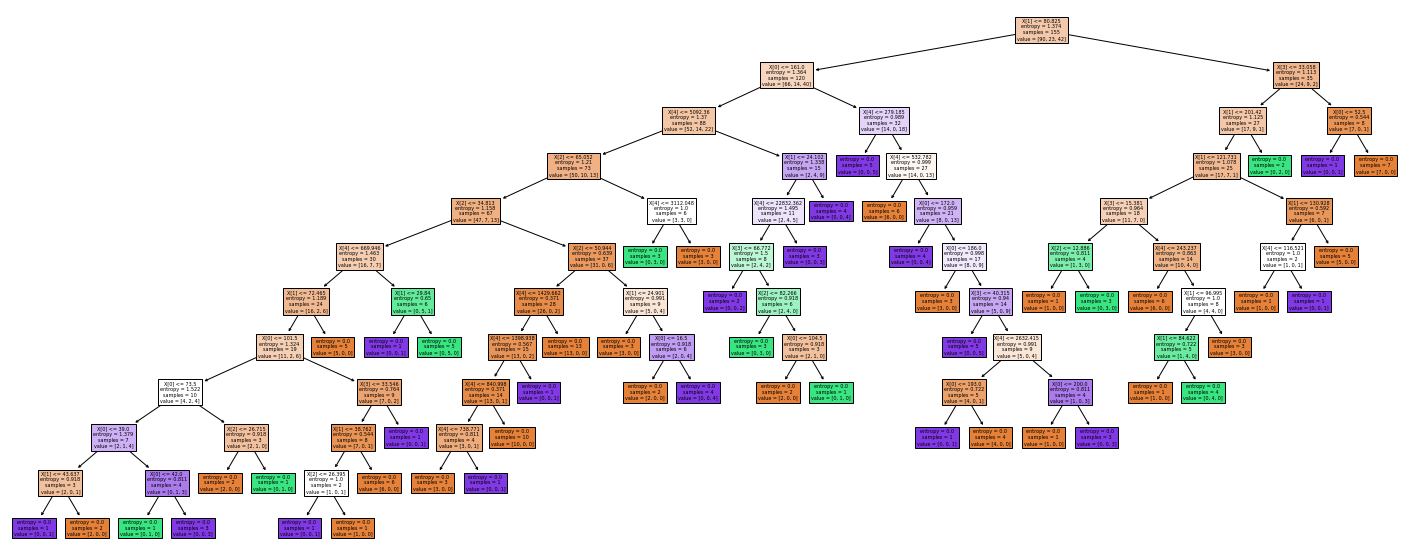

In [105]:
plt.figure(figsize=(25, 10))
tree.plot_tree(dt, filled=True)

In [79]:
# AUC ROC scores on the training and test dataset
from sklearn.multiclass import OneVsRestClassifier
AUC_ROC_Score = roc_auc_score(y_train, dt.predict_proba(new_train),multi_class='ovr')
print("On training data, DT has a AUCROC Score of:", AUC_ROC_Score * 100)

AUC_ROC_Score = roc_auc_score(y_test, dt.predict_proba(new_test),multi_class='ovr')
print("On test data, DT has a AUCROC Score of:", AUC_ROC_Score * 100)

On training data, DT has a AUCROC Score of: 100.0
On test data, DT has a AUCROC Score of: 63.951854708433665


2. Random forest

In [106]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None)
rf = rf.fit(X_train, y_train)

In [107]:
Y_predicted_rf = rf.predict(X_test)
Y_pred_train_rf = rf.predict(X_train)

In [108]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_rf, y_test))

ac = accuracy_score(y_test, Y_predicted_rf)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test, Y_predicted_rf, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test, Y_predicted_rf, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test, Y_predicted_rf, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test, Y_predicted_rf, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[31  7 14]
 [ 2  0  0]
 [ 4  4  5]]

 Macro Averaged Accuracy :0.5373134328358209

 Macro Averaged Precision :0.3269230769230769

 Macro Averaged Recall :0.36699857752489334

 Macro Averaged F1-Score :0.336376404494382

 Micro Averaged F1-Score:0.5373134328358209


3. XG Boost

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
gradient_boost = GradientBoostingClassifier()
gb = gb.fit(X_train, y_train)

In [112]:
Y_predicted_gb = gb.predict(X_test)
Y_pred_train_gb = gb.predict(X_train)

In [113]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_gb, y_test))

ac = accuracy_score(y_test, Y_predicted_gb)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test, Y_predicted_gb, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test,Y_predicted_gb, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test, Y_predicted_gb, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test,Y_predicted_gb, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[29  8 14]
 [ 1  0  0]
 [ 7  3  5]]

 Macro Averaged Accuracy :0.5074626865671642

 Macro Averaged Precision :0.3006535947712418

 Macro Averaged Recall :0.3489805595068753

 Macro Averaged F1-Score :0.31773618538324416

 Micro Averaged F1-Score:0.5074626865671642


Logistic Regression

In [115]:
logres=LogisticRegression(solver='liblinear')
logres.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [116]:
Y_predicted_logres = logres.predict(X_test)
Y_pred_train_logres = logres.predict(X_train)

In [117]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_logres, y_test))

ac = accuracy_score(y_test, Y_predicted_logres)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test, Y_predicted_logres, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test, Y_predicted_logres, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test, Y_predicted_logres, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test, Y_predicted_logres, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[30 10 15]
 [ 2  0  0]
 [ 5  1  4]]

 Macro Averaged Accuracy :0.5074626865671642

 Macro Averaged Precision :0.3151515151515151

 Macro Averaged Recall :0.34044570886676145

 Macro Averaged F1-Score :0.3093453273363318

 Micro Averaged F1-Score:0.5074626865671642
